# Criando nomes

In [2]:
import pandas as pd

In [3]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [4]:
#filtro = nomes_m.nome=='ALEF'
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [5]:
alunosC = [nomes_f, nomes_m]
alunosN = pd.concat(alunosC)[["nome", "sexo"]]
alunosN.sample(5)

,nome,sexo
167,TAINARA,F
166,KELLY,F
188,POLIANA,F
26,GUSTAVO,M
128,EDVALDO,M


# Incluindo ID dos alunos

In [6]:
import numpy as np

In [7]:
alunosN["id_aluno"] = np.random.permutation(len(alunosN)) + 1
alunosN.sample(5)

,nome,sexo,id_aluno
102,MARILENE,F,114
190,NATANAEL,M,292
17,LUCIANA,F,132
194,CLARA,F,322
67,PAULA,F,253


In [10]:
    dominios = ["@domemail.com", "@seremail.com"]
    alunosN["dominio"] = np.random.choice(dominios, len(alunosN))
    alunosN["e-mail"] = alunosN.nome.str.cat(alunosN.dominio).str.lower()
    alunosN = alunosN.drop(columns=["dominio"])
    # alunosN.query('id_aluno == 246')
    alunosN.head()

,nome,sexo,id_aluno,e-mail
0,MARIA,F,358,maria@seremail.com
1,ANA,F,140,ana@domemail.com
2,FRANCISCA,F,40,francisca@seremail.com
3,ANTONIA,F,163,antonia@domemail.com
4,ADRIANA,F,272,adriana@domemail.com


# Criando os cursos

In [ ]:
# !pip3 install html5lib
# !pip3 install lxml

In [11]:
import html5lib
import lxml

In [12]:
url = "http://tabela-cursos.herokuapp.com/index.html"
tabelaCursos = pd.read_html(url)

In [13]:
# usamos esse atalho [0] para transformar a lista em DF
cursos = tabelaCursos[0]
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando index (cursos)

In [14]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})
cursos['id'] = cursos.index + 1
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculas por cursos

C:\Users\alefc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

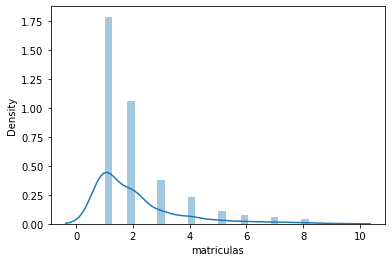

In [15]:
import seaborn as sns
alunosN['matriculas'] = np.ceil(np.random.exponential(size=len(alunosN.nome)) * 1.5).astype(int)
# alunosN.describe()
# alunosN.matriculas.value_counts() - Qtd de matricula por curso
sns.distplot(alunosN.matriculas)

# Selecionando cursos

In [16]:
todasMatriculas = []
x = np.random.rand(20)
prob = x / sum(x)

for index, row in alunosN.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todasMatriculas.append(mat)

matriculas = pd.DataFrame(todasMatriculas, columns= ['id_aluno', 'id_curso'])

In [17]:
matriculasCurso = matriculas.groupby('id_curso').count().join(cursos.nome_do_curso).rename(columns={'id_aluno': 'quantidade_alunos'})
matriculasCurso.head()

,quantidade_alunos,nome_do_curso
id_curso,,
1,31,Lógica de programação
2,49,Java para Web
3,54,C# para Web
4,14,Ruby on Rails
5,35,Cursos de Python


# Exportando os dados

In [ ]:
matriculasCurso.to_csv('matriculas_por_curso.csv', index=False)
# Usamos to_ para os demais formatos.

In [ ]:
prox_T.to_excel('proxima_turma.xlsx', index=False)

In [ ]:
matriculasCurso.to_sql('matriculas', con)
# Neste comando SQL estamos enviando DF para o SQL, no primeiro argumento se refere ao nome da tabela

# Trabalhando com SQL

In [18]:
# !pip install sqlalchemy
from sqlalchemy import create_engine, MetaData, Table
import sqlite3

In [19]:
engine = create_engine('sqlite:///:memory:')
con = sqlite3.connect('aescola.db')
cursor = con.cursor()

In [113]:
matriculasCurso.to_sql('matriculas', con)
# Neste comando SQL estamos enviando DF para o SQL, no primeiro argumento se refere ao nome da tabela

In [20]:
selectColunas = 'nome_do_curso, quantidade_alunos'
selectTabela = 'matriculas'
selectCondi = 'quantidade_alunos > 80'
selectSQL = 'SELECT {} FROM {} WHERE {}'.format(selectColunas, selectTabela, selectCondi)

# Turma por curso

In [24]:
# Variaveis:
id_curso = 3
nome_curso = cursos.loc[id_curso]
nome_curso = nome_curso.nome_do_curso

In [25]:
# DF
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
prox_T = proxima_turma.set_index('id_aluno').join(alunosN.set_index('id_aluno'))
prox_T['curso'] = nome_curso
prox_T = prox_T.drop(columns=["id_curso"])
prox_T = prox_T.rename(columns={'nome': 'aluno'})
prox_T.head()

,aluno,sexo,e-mail,matriculas,curso
id_aluno,,,,,
9,VERA,F,vera@seremail.com,3,C# para Web
10,VALDECIR,M,valdecir@domemail.com,3,C# para Web
22,LUIZA,F,luiza@domemail.com,1,C# para Web
45,GEOVANA,F,geovana@seremail.com,6,C# para Web
51,FABIANO,M,fabiano@seremail.com,2,C# para Web


# Excel

In [109]:
prox_T.to_excel('proxima_turma.xlsx', index=False)

In [23]:
pd.read_excel('proxima_turma.xlsx')

,id_curso,aluno,sexo,e-mail,matriculas,curso
0,3,REGINA,F,regina@domemail.com,2,C# para Web
1,3,ESTER,F,ester@domemail.com,3,C# para Web
2,3,MARILIA,F,marilia@domemail.com,1,C# para Web
3,3,NILZA,F,nilza@seremail.com,1,C# para Web
4,3,RAFAEL,M,rafael@seremail.com,1,C# para Web
5,3,LEONARDO,M,leonardo@seremail.com,1,C# para Web
6,3,JORGE,M,jorge@domemail.com,6,C# para Web
7,3,THIAGO,M,thiago@seremail.com,5,C# para Web
8,3,MAURO,M,mauro@domemail.com,3,C# para Web
9,3,EVERTON,M,everton@domemail.com,7,C# para Web
